# Intro to Google Colab and Python for applied scientists
(Some thoughts on elements of a friendly Python Stats Bootcamp)

HARUG!

2023-08-02

# 0 Objectives

The aim of this notebook is to illustrate the basic use of Colab and Python for beginners.  The material is designed for applied scientists, students, instructors and other interesting people.

Objectives

- A simple data example of a "legitimate task" involving data

- Illustrate basic use of Colab and Python by example

- Reinforcement of concepts with simple quiz questions

- Introduce some chatGPT prompts

- Resources for further study in different modes of learning

Jupyter notebooks (the name of this kind of file) and Google Colab are a great way to learn Python. Notebooks are a great way to mix executable code with rich contents (HTML, images, equations written in LaTeX). Colab allows you to run notebooks on the cloud for free without any prior installation.

# 1 Simple data example

The document that you are reading is not a static web page, but an interactive environment called a notebook, that lets you write and execute code. Notebooks consist of so-called code cells, blocks of one or more Python instructions. For example, here is a code cell that stores the result of a computation (the number of seconds in a day) in a variable and prints its value:

The following code is to read in a small dataset looking at potato sizeand will:

1. Print the first few lines of data

2. Create a graph looking at the relationship between the **number of potatoes** and the total **weight of potatoes** a single potato plant produces.

3. Print the results of linear regression on these variables.

Click on the "play" button to "execute" the code in the cell below. You should be able to see the result. Alternatively, you can also execute the cell by pressing Ctrl + Enter if you are on Windows / Linux or Command + Enter if you are on a Mac.

**NB don't worry about understanding the code for now, let's just run it and see what it does...**

   samp_length  samp_no  plant_no  stems_above  tot_count  tot_wt
0          158        1         1            5          9     161
1          158        1         2            4         12     361
2          158        1         3            9         41    1059
3          158        1         4            8         36     775
4          158        1         5            5         22     686


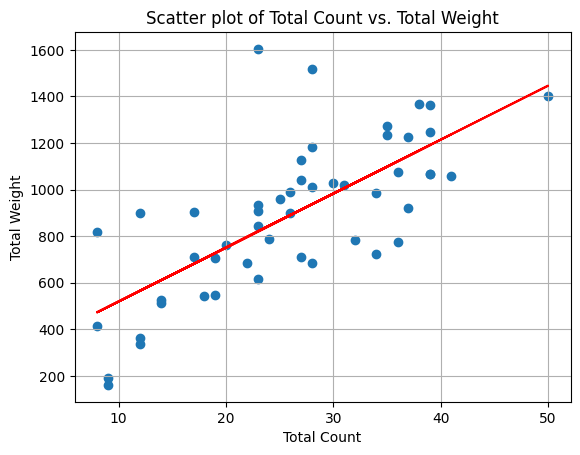

Slope: 23.167410759135063
Intercept: 287.4439720473057
R-value: 0.7184432119637679
P-value: 4.2431462505918145e-09
Standard Error: 3.2375391426577558


In [9]:
# !pip install pandas
# !pip install matplotlib
# !pip install scipy
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

# You'll need to drag the file 'tuber_50.xlsx' into the Colab folder to the left
data = pd.read_excel('tuber_50.xlsx', sheet_name='data')
print(data.head())

# Extracting the 'tot_count' and 'tot_wt' columns for the scatter plot
tot_count = data['tot_count']
tot_wt = data['tot_wt']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(tot_count, tot_wt)

# Create a line representing the linear regression fit
line_fit = slope * tot_count + intercept

# Creating the scatter plot
plt.scatter(tot_count, tot_wt)
plt.plot(tot_count, line_fit, color='red', label='Linear Regression Fit')

# Creating the scatter plot

plt.xlabel('Total Count')
plt.ylabel('Total Weight')
plt.title('Scatter plot of Total Count vs. Total Weight')
plt.grid(True)
plt.show()

# Print regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# 2 Exploring simple use of Colab and Python

Try running the code and exercises below

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

Variables that you defined in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

Note that the order of execution is important. For instance, if we do not run the cell storing *seconds_in_a_day* beforehand, the above cell will raise an error, as it depends on this variable. To make sure that you run all the cells in the correct order, you can also click on "Runtime" in the top-level menu, then "Run all".

### **Try this (exercise)!**

Add a cell below this cell: click on this cell then click on "+ Code". In the new cell, compute and display the number of seconds in a year by reusing the variable *seconds_in_a_day*. Run the new cell.

# 3 Python tricks

Python is one of the most popular programming languages for machine learning, both in academia and in industry. As such, it is essential to learn this language for anyone interested in machine learning. In this section, we will review Python basics.

## Arithmetic operations

Python supports the usual arithmetic operators: + (addition), * (multiplication), / (division), ** (power), // (integer division).

## Lists

Lists are a container type for ordered sequences of elements. Lists can be initialized empty

In [ ]:
my_list = []

or with some initial elements

In [ ]:
my_list = [1, 2, 3]

Lists have a dynamic size and elements can be added (appended) to them

In [ ]:
my_list.append(4)
my_list

We can access individual elements of a list (indexing starts from 0)

In [ ]:
my_list[2]

We can access "slices" of a list using `my_list[i:j]` where `i` is the start of the slice (again, indexing starts from 0) and `j` the end of the slice. For instance:

In [ ]:
my_list[1:3]

Omitting the second index means that the slice should run until the end of the list

In [ ]:
my_list[1:]

We can check if an element is in the list using `in`

In [ ]:
5 in my_list

The length of a list can be obtained using the `len` function

In [ ]:
len(my_list)

## Strings

Strings are used to store text. They can be delimited using either single quotes or double quotes

In [ ]:
string1 = "some text"
string2 = 'some other text'

Strings behave similarly to lists. As such we can access individual elements in exactly the same way

In [ ]:
string1[3]

and similarly for slices

In [ ]:
string1[5:]

String concatenation is performed using the `+` operator

In [ ]:
string1 + " " + string2

## Conditionals

As their name indicates, conditionals are a way to execute code depending on whether a condition is True or False. As in other languages, Python supports `if` and `else` but `else if` is contracted into `elif`, as the example below demonstrates.

In [ ]:
my_variable = 5
if my_variable < 0:
  print("negative")
elif my_variable == 0:
  print("null")
else: # my_variable > 0
  print("positive")

Here `<` and `>` are the strict `less` and `greater than` operators, while `==` is the equality operator (not to be confused with `=`, the variable assignment operator). The operators `<=` and `>=` can be used for less (resp. greater) than or equal comparisons.

Contrary to other languages, blocks of code are delimited using indentation. Here, we use 2-space indentation but many programmers also use 4-space indentation. Any one is fine as long as you are consistent throughout your code.

## Loops

Loops are a way to execute a block of code multiple times. There are two main types of loops: while loops and for loops.

While loop

In [ ]:
i = 0
while i < len(my_list):
  print(my_list[i])
  i += 1 # equivalent to i = i + 1

For loop

In [ ]:
for i in range(len(my_list)):
  print(my_list[i])

If the goal is simply to iterate over a list, we can do so directly as follows

In [ ]:
for element in my_list:
  print(element)

## Functions

To improve code readability, it is common to separate the code into different blocks, responsible for performing precise actions: functions. A function takes some inputs and process them to return some outputs.

In [1]:
def square(x):
  return x ** 2

def multiply(a, b):
  return a * b

# Functions can be composed.
square(x = multiply(a = 3, b = 2))

36

To improve code readability, it is sometimes useful to explicitly name the arguments

In [ ]:
square(multiply(a=3, b=2))

## **Try this (exercise)!**

**Exercise 1.** Using a conditional, write the [relu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) function defined as follows

$\text{relu}(x) = \left\{
   \begin{array}{rl}
     x, & \text{if }  x \ge 0 \\
     0, & \text{otherwise }.
   \end{array}\right.$

In [ ]:
def relu(x):
  # Write your function here
  return

relu(-3)

**Exercise 2.** Using a for loop, write a function that computes the [Euclidean norm](https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm) of a vector, represented as a list.

In [ ]:
def euclidean_norm(vector):
  # Write your function here
  return

my_vector = [0.5, -1.2, 3.3, 4.5]
# The result should be roughly 5.729746940310715
euclidean_norm(my_vector)

**Exercise 3.** Using a for loop and a conditional, write a function that returns the maximum value in a vector.

In [ ]:
def vector_maximum(vector):
  # Write your function here
  return

**Bonus exercise.** if time permits, write a function that sorts a list in ascending order (from smaller to bigger) using the [bubble sort](https://en.wikipedia.org/wiki/Bubble_sort) algorithm.

In [ ]:
def bubble_sort(my_list):
  # Write your function here
  return

my_list = [1, -3, 3, 2]
# Should return [-3, 1, 2, 3]
bubble_sort(my_list)



*   List of Python [tutorials](https://wiki.python.org/moin/BeginnersGuide/Programmers)
* Four-hour [course](https://www.youtube.com/watch?v=rfscVS0vtbw) on Youtube



# 4 NumPy a Python toolbox for manipulating data

NumPy is a popular library for storing arrays of numbers and performing computations on them. Not only does this enable to write often more succinct code, this also makes the code faster, since most NumPy routines are implemented in C for speed.

To use NumPy in your program, you need to import it as follows

In [ ]:
import numpy as np

## Array creation



NumPy arrays can be created from Python lists

In [ ]:
my_array = np.array([1, 2, 3])
my_array

NumPy supports array of arbitrary dimension. For example, we can create two-dimensional arrays (e.g. to store a matrix) as follows

In [ ]:
my_2d_array = np.array([[1, 2, 3], [4, 5, 6]])
my_2d_array

We can access individual elements of a 2d-array using two indices

In [ ]:
my_2d_array[1, 2]

We can also access rows

In [ ]:
my_2d_array[1]

and columns

In [ ]:
my_2d_array[:, 2]

Arrays have a `shape` attribute

In [ ]:
print(my_array.shape)
print(my_2d_array.shape)

Contrary to Python lists, NumPy arrays must have a type and all elements of the array must have the same type.

In [ ]:
my_array.dtype

The main types are `int32` (32-bit integers), `int64` (64-bit integers), `float32` (32-bit real values) and `float64` (64-bit real values).

The `dtype` can be specified when creating the array

In [ ]:
my_array = np.array([1, 2, 3], dtype=np.float64)
my_array.dtype

We can create arrays of all zeros using

In [ ]:
zero_array = np.zeros((2, 3))
zero_array

and similarly for all ones using `ones` instead of `zeros`.

We can create a range of values using

In [ ]:
np.arange(5)

or specifying the starting point

In [ ]:
np.arange(3, 5)

Another useful routine is `linspace` for creating linearly spaced values in an interval. For instance, to create 10 values in `[0, 1]`, we can use

In [ ]:
np.linspace(0, 1, 10)

Another important operation is `reshape`, for changing the shape of an array

In [ ]:
my_array = np.array([1, 2, 3, 4, 5, 6])
my_array.reshape(3, 2)

Play with these operations and make sure you understand them well.

## Basic operations

In NumPy, we express computations directly over arrays. This makes the code much more succinct.

Arithmetic operations can be performed directly over arrays. For instance, assuming two arrays have a compatible shape, we can add them as follows

In [ ]:
array_a = np.array([1, 2, 3])
array_b = np.array([4, 5, 6])
array_a + array_b

Compare this with the equivalent computation using a for loop

In [ ]:
array_out = np.zeros_like(array_a)
for i in range(len(array_a)):
  array_out[i] = array_a[i] + array_b[i]
array_out

Not only this code is more verbose, it will also run much more slowly.

In NumPy, functions that operates on arrays in an element-wise fashion are called [universal functions](https://numpy.org/doc/stable/reference/ufuncs.html). For instance, this is the case of `np.sin`

In [ ]:
np.sin(array_a)

Vector inner product can be performed using `np.dot`

In [ ]:
np.dot(array_a, array_b)

When the two arguments to `np.dot` are both 2d arrays, `np.dot` becomes matrix multiplication

In [ ]:
array_A = np.random.rand(5, 3)
array_B = np.random.randn(3, 4)
np.dot(array_A, array_B)

Matrix transpose can be done using `.transpose()` or `.T` for short

In [ ]:
array_A.T

## Slicing and masking

Like Python lists, NumPy arrays support slicing

In [ ]:
np.arange(10)[5:]

We can also select only certain elements from the array

In [ ]:
x = np.arange(10)
mask = x >= 5
x[mask]

### **Try this (exercise)!**

**Exercise 1.** Create a 3d array of shape (2, 2, 2), containing 8 values. Access individual elements and slices.

**Exercise 2.** Rewrite the relu function (see Python section) using [np.maximum](https://numpy.org/doc/stable/reference/generated/numpy.maximum.html). Check that it works on both a single value and on an array of values.

In [ ]:
def relu_numpy(x):
  return

relu_numpy(np.array([1, -3, 2.5]))

**Exercise 3.** Rewrite the Euclidean norm of a vector (1d array) using NumPy (without for loop)

In [ ]:
def euclidean_norm_numpy(x):
  return

my_vector = np.array([0.5, -1.2, 3.3, 4.5])
euclidean_norm_numpy(my_vector)

**Exercise 4.** Write a function that computes the Euclidean norms of a matrix (2d array) in a row-wise fashion. Hint: use the `axis` argument of [np.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html).

In [ ]:
def euclidean_norm_2d(X):
  return

my_matrix = np.array([[0.5, -1.2, 4.5],
                      [-3.2, 1.9, 2.7]])
# Should return an array of size 2.
euclidean_norm_2d(my_matrix)

**Exercise 5.** Compute the mean value of the features in the [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Hint: use the `axis` argument on [np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html).

In [ ]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

# Result should be an array of size 4.

## Going further

* NumPy [reference](https://numpy.org/doc/stable/reference/)
* SciPy [lectures](https://scipy-lectures.org/)
* One-hour [tutorial](https://www.youtube.com/watch?v=QUT1VHiLmmI) on Youtube



# 5 Matplotlib

## Basic plots

Matplotlib is a plotting library for Python.

We start with a rudimentary plotting example.

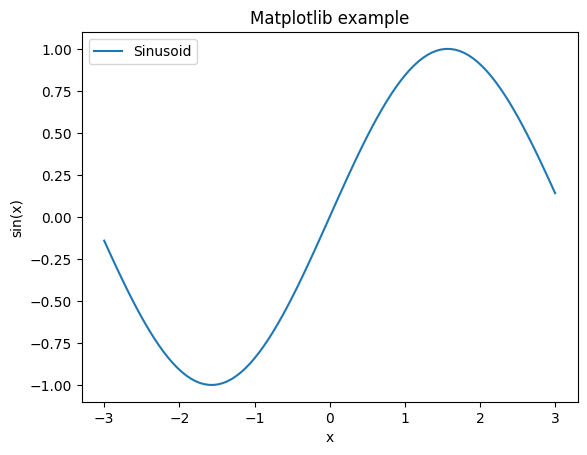

In [14]:
import numpy as np
from matplotlib import pyplot as plt

x_values = np.linspace(-3, 3, 100)

plt.figure()
plt.plot(x_values, np.sin(x_values), label="Sinusoid")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("Matplotlib example")
plt.legend(loc="upper left")
plt.show()

We continue with a rudimentary scatter plot example. This example displays samples from the [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) using the first two features. Colors indicate class membership (there are 3 classes).

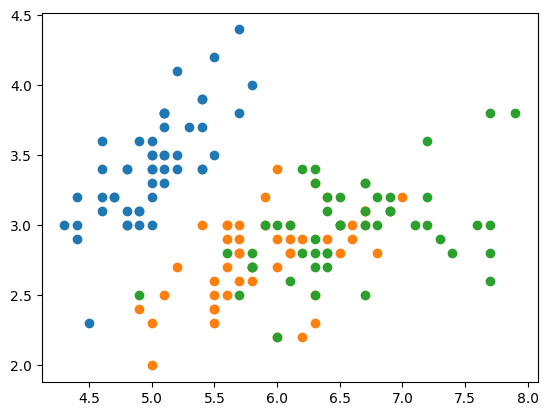

In [11]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

X_class0 = X[y == 0]
X_class1 = X[y == 1]
X_class2 = X[y == 2]

plt.figure()
plt.scatter(X_class0[:, 0], X_class0[:, 1], label="Class 0", color="C0")
plt.scatter(X_class1[:, 0], X_class1[:, 1], label="Class 1", color="C1")
plt.scatter(X_class2[:, 0], X_class2[:, 1], label="Class 2", color="C2")
plt.show()

We see that samples belonging to class 0 can be linearly separated from the rest using only the first two features.

## Exercises



**Exercise 1.** Plot the relu and the [softplus](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)#Softplus) functions on the same graph.

What is the main difference between the two functions?

**Exercise 2.** Repeat the same scatter plot but using the [digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) instead.

In [12]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

Are pixel values good features for classifying samples?